In [1]:
from sklearn import metrics

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from statsmodels.stats.proportion import proportions_ztest

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms=MinMaxScaler()
sc=StandardScaler()

from sklearn.model_selection import GridSearchCV

import scikitplot as skplt

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [2]:
bank=pd.read_csv('bank-full.csv',delimiter=';')

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
main_df=bank.copy(deep=True)

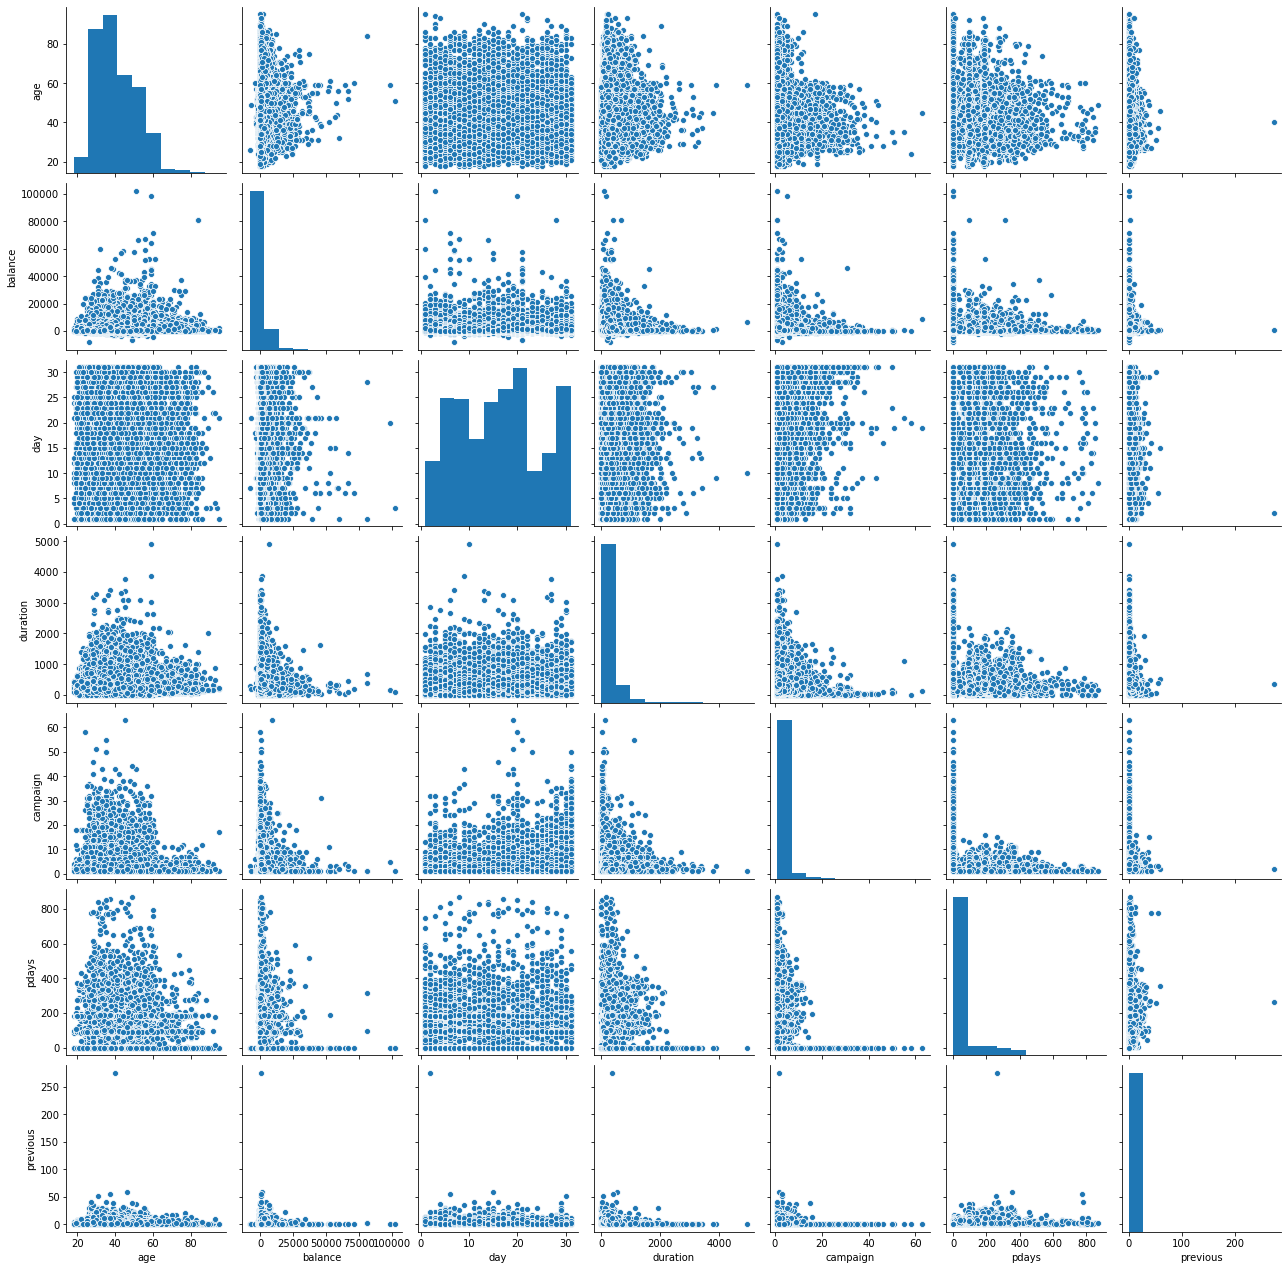

In [4]:
sns.pairplot(bank)

###### Reducing Skewness of the age

###### Reducing skewness of the balance

In [5]:
main_df['balance'].skew()

8.360308326166326

In [6]:
np.cbrt(main_df['balance']).skew()

-0.07818749236478738

In [7]:
main_df['balance']=np.cbrt(main_df['balance'])

###### Reducing skewness of the duration

In [8]:
main_df['duration'].skew()

3.144318099423456

In [9]:
np.cbrt(main_df['duration']).skew()

0.64014649967056

In [10]:
main_df[main_df['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,7.054004,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,17.689106,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,5.451362,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [11]:
main_df['duration']=np.cbrt(main_df['duration'])

In [12]:
main_df['y']=main_df['y'].replace(['no','yes'],[0, 1])

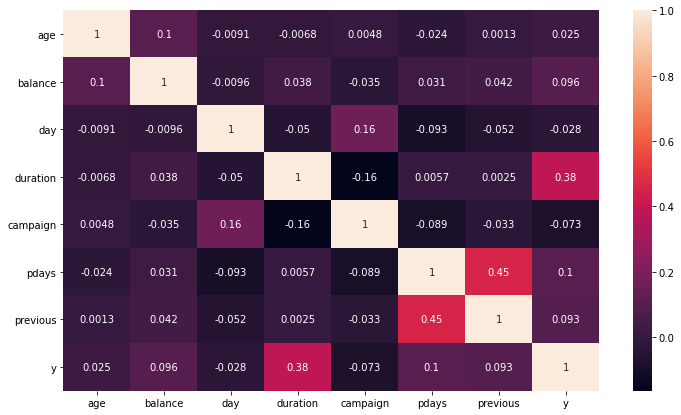

In [13]:
corr_columns = bank.select_dtypes(include=np.number)
plt.figure(figsize=(12,7))
sns.heatmap(main_df.corr(),annot=True)
plt.show()

In [14]:
#Due to high Correlation dropping Duration
main_df.drop('duration',axis=1,inplace=True)

#### Conversion

In [15]:
cat_cols = main_df.select_dtypes(include=[
        'object']).columns
df = pd.get_dummies(main_df, columns=cat_cols,drop_first=True)

#standard Scaler for Numerical Variables
scaler = StandardScaler()
num_cols = main_df.select_dtypes(include=np.number).columns
num_cols = num_cols.drop('y')
df[num_cols] = scaler.fit_transform(df[num_cols])

In [16]:
X1 = df.drop(columns=['y'])


y1 =main_df['y']
print(X1.shape)
print(y1.shape)

y1.value_counts().to_frame()

(45211, 41)
(45211,)


,y
0,39922
1,5289


#### Random sampling

In [21]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)

X, y = sampler.fit_resample(X1, y1)
pd.Series(y).value_counts()

0    39922
1    39922
Name: y, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
def algorithm(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train,y_train)
    
    y_test_model_predict=model.predict(X_test)
    
    print('CLASSIFICATION REFORT')
    print(classification_report(y_test, y_test_model_predict))
    
    print('CONFUSION MATRIX')
    skplt.metrics.plot_confusion_matrix(y_test,y_test_model_predict)


    model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    print('Accuracy Score',metrics.accuracy_score(y_test,y_test_model_predict))
    print('Roc Auc Score ',model_roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return(fpr,tpr)

#### Logistic Regression model

CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      7908
           1       0.74      0.63      0.68      8061

    accuracy                           0.70     15969
   macro avg       0.71      0.70      0.70     15969
weighted avg       0.71      0.70      0.70     15969

CONFUSION MATRIX
Accuracy Score 0.7004821842319494
Roc Auc Score  0.7671116675661687


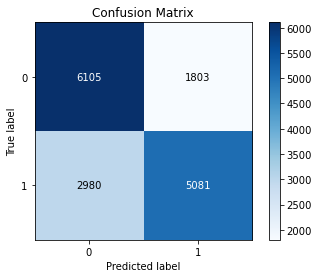

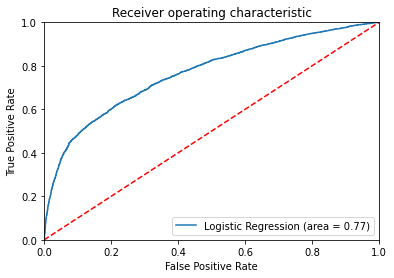

In [102]:
logreg = LogisticRegression()
fpr_logr,tpr_logr=algorithm(logreg,X,y)

#### Knn

In [25]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(metrics.classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      7908
           1       0.81      0.97      0.88      8061

    accuracy                           0.87     15969
   macro avg       0.89      0.87      0.87     15969
weighted avg       0.89      0.87      0.87     15969



0.9661864214173201


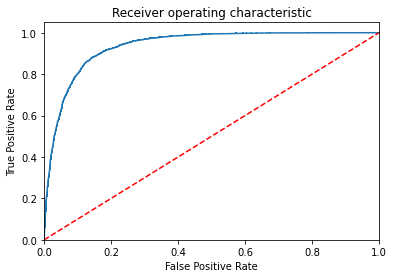

In [111]:
knn_proba=knn.predict_proba(X_test)
print(metrics.roc_auc_score(y_test,knn_proba[:,-1]))
fpr_Knn1, tpr_Knn1, thresholds = roc_curve(y_test,knn_proba[:,1])

plt.figure()
plt.plot(fpr, tpr,marker=',')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

#### Decision Tree

CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      7908
           1       0.90      1.00      0.95      8061

    accuracy                           0.94     15969
   macro avg       0.95      0.94      0.94     15969
weighted avg       0.95      0.94      0.94     15969

CONFUSION MATRIX
Roc Auc Score  0.9411355589276682


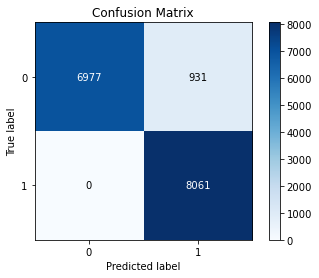

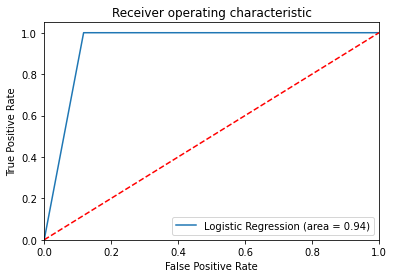

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
algorithm(dt,X,y)

#### Random Forest Classifier

CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      7908
           1       0.95      1.00      0.98      8061

    accuracy                           0.98     15969
   macro avg       0.98      0.98      0.98     15969
weighted avg       0.98      0.98      0.98     15969

CONFUSION MATRIX
Roc Auc Score  0.9998056438899723


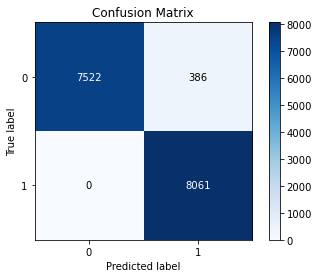

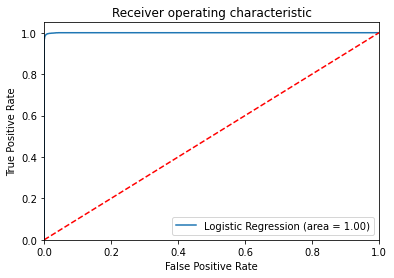

In [28]:
rf=RandomForestClassifier()
algorithm(rf,X,y)

    Decision Tree and Random Forest Classifier shows very high precision and recall scores subjective to overfitting the 
    data hence we can say that Decision tree and random forest Classifier DoesNot applies to this Model

#### Adaboost

CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      7908
           1       0.77      0.63      0.69      8061

    accuracy                           0.72     15969
   macro avg       0.72      0.72      0.72     15969
weighted avg       0.72      0.72      0.72     15969

CONFUSION MATRIX
Roc Auc Score  0.7810757450288791


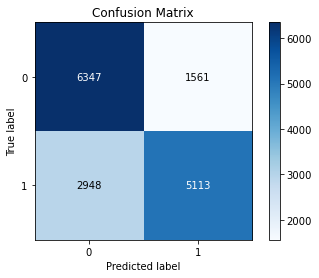

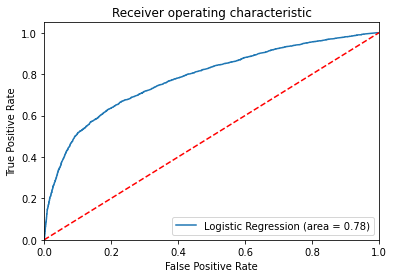

In [58]:
ada=AdaBoostClassifier()
algorithm(ada,X,y)

#### XGBoost Classifier

[17:21:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      7908
           1       0.85      0.78      0.81      8061

    accuracy                           0.82     15969
   macro avg       0.82      0.82      0.82     15969
weighted avg       0.82      0.82      0.82     15969

CONFUSION MATRIX
Roc Auc Score  0.9005306073184883


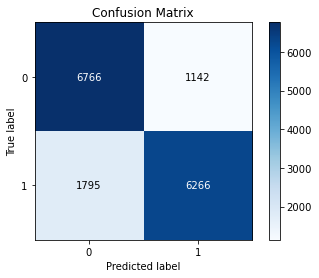

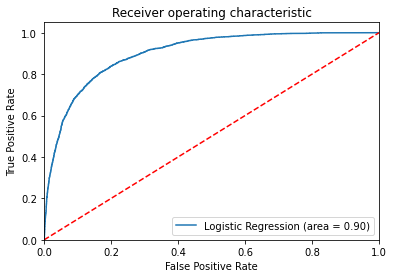

In [29]:
xgb = XGBClassifier(use_label_encoder=False)
algorithm(xgb,X,y)

### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.62      0.87      0.72      7908
           1       0.79      0.47      0.59      8061

    accuracy                           0.67     15969
   macro avg       0.70      0.67      0.65     15969
weighted avg       0.70      0.67      0.65     15969

CONFUSION MATRIX
Accuracy Score 0.6677312292566848
Roc Auc Score  0.7336197150495807


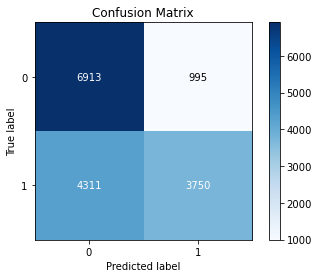

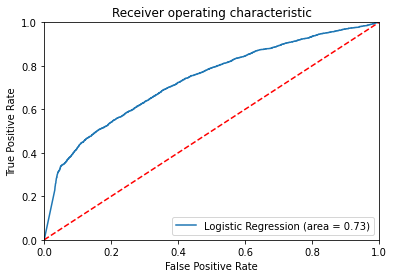

In [103]:
NB=GaussianNB()
fpr_NB,tpr_NB=algorithm(NB,X,y)

#### CROSS VALIDATION

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
algo=[]
cvs_score=[]

#### Logistic Regression

In [34]:
logreg = LogisticRegression()
cs_logr=cross_val_score(logreg,X_train,y_train,cv=5)
cvp_logr=cross_val_predict(logreg,X_train,y_train,cv=5,method='decision_function')
cvp_logr2=cross_val_predict(logreg,X_train,y_train,cv=5)
print('scores',cs_logr)
print('\nMean Cross val scores',cs_logr.mean())
print('\nClassification report')
print(classification_report(y_train,cvp_logr2 ))

logr_roc_auc = roc_auc_score(y_train, cvp_logr)
print('\nROC Score',logr_roc_auc)
      
algo.append('LogisticReg')
cvs_score.append(cs_logr.mean())

metrics.confusion_matrix(y_train,cvp_logr2)

scores [0.70489237 0.70317025 0.7097456  0.70590998 0.70716243]

Mean Cross val scores 0.7061761252446184

Classification report
              precision    recall  f1-score   support

           0       0.68      0.77      0.73     32014
           1       0.74      0.64      0.68     31861

    accuracy                           0.71     63875
   macro avg       0.71      0.71      0.70     63875
weighted avg       0.71      0.71      0.70     63875


ROC Score 0.7742518624452199


array([[24753,  7261],
       [11507, 20354]], dtype=int64)

In [ ]:
algo.append('LogisticReg')
cvs_score.append(cs_logr.mean())


#### Knn

In [126]:
knn=KNeighborsClassifier()
cs_knn=cross_val_score(knn,X_train,y_train,cv=5)
cvp_knn=cross_val_predict(knn,X_train,y_train,cv=5)

In [127]:
print('scores',cs_knn)
print('\nMean Cross val scores',cs_knn.mean())

scores [0.84062622 0.83178082 0.83178082 0.83459883 0.8407045 ]

Mean Cross val scores 0.8358982387475538


In [128]:
print('\nClassification report')
print(classification_report(y_train,cvp_knn ))
metrics.confusion_matrix(y_train,cvp_knn)


Classification report
              precision    recall  f1-score   support

           0       0.92      0.73      0.82     32014
           1       0.78      0.94      0.85     31861

    accuracy                           0.84     63875
   macro avg       0.85      0.84      0.83     63875
weighted avg       0.85      0.84      0.83     63875



array([[23460,  8554],
       [ 1928, 29933]], dtype=int64)

In [ ]:
algo.append('KnnClassifier')
cvs_score.append(cs_knn.mean())

In [140]:
cvp_knn=cross_val_predict(knn,X_train,y_train,cv=3,method='predict_proba')

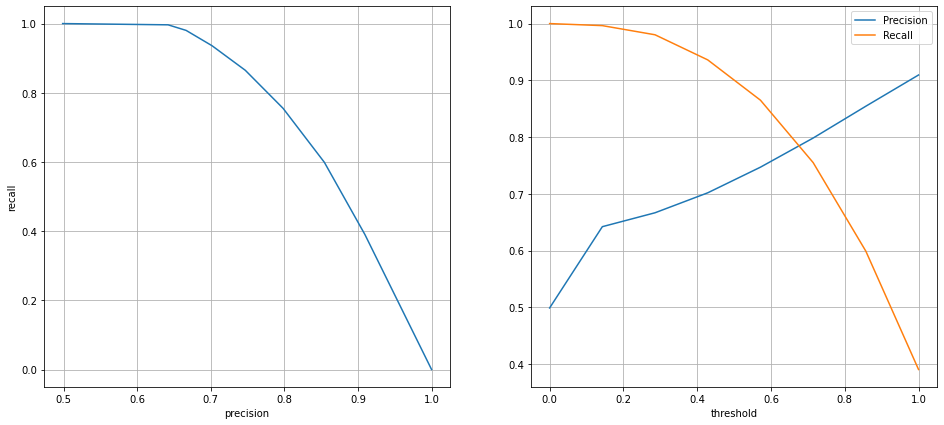

In [142]:
knn_precision,knn_recall,knn_thresh=metrics.precision_recall_curve(y_train,cvp_knn[:,-1])

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(knn_precision,knn_recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid()

plt.subplot(1,2,2)
plt.plot(knn_thresh,knn_precision[:-1],label='Precision')
plt.plot(knn_thresh,knn_recall[:-1],label='Recall')
plt.xlabel('threshold')
plt.legend()
plt.grid()

#### Decision Tree Classifier

In [37]:
dt=DecisionTreeClassifier()
cs_dt=cross_val_score(rf,X_train,y_train,cv=5)

print('CrossValidation Scores=',cs_dt)
print('Mean CrossValidation Scores',cs_dt.mean())
cvp_DT=cross_val_predict(dt,X_train,y_train,cv=5)
print(classification_report(y_train, cvp_DT))

CrossValidation Scores= [0.96751468 0.96790607 0.96360078 0.96649706 0.96947162]
Mean CrossValidation Scores 0.9669980430528377
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     32014
           1       0.88      1.00      0.94     31861

    accuracy                           0.93     63875
   macro avg       0.94      0.93      0.93     63875
weighted avg       0.94      0.93      0.93     63875



0.9334413151733326


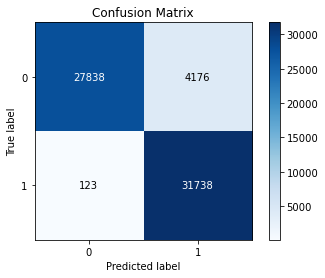

In [130]:
cvp_DT2=cross_val_predict(dt,X_train,y_train,cv=5,method='predict_proba')

rf_roc_auc = roc_auc_score(y_train, cvp_DT2[:,-1])
print(rf_roc_auc)

skplt.metrics.plot_confusion_matrix(y_train,cvp_DT)

In [72]:
algo.append('Dec Tree')
cvs_score.append(cs_dt.mean())


#### Random Forest Classifier

In [39]:
rf=RandomForestClassifier()
cs_rf=cross_val_score(rf,X_train,y_train,cv=5)

print('CrossValidation Scores=',cs_rf)
print('Mean CrossValidation Scores',cs_rf.mean())
cvp_rf=cross_val_predict(rf,X_train,y_train,cv=5)

CrossValidation Scores= [0.96735812 0.96727984 0.96399217 0.96641879 0.96986301]
Mean CrossValidation Scores 0.9669823874755382


In [40]:
print(classification_report(y_train, cvp_rf))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     32014
           1       0.94      1.00      0.97     31861

    accuracy                           0.97     63875
   macro avg       0.97      0.97      0.97     63875
weighted avg       0.97      0.97      0.97     63875



In [41]:
cvp_rf2=cross_val_predict(rf,X_train,y_train,cv=5,method='predict_proba')

rf_roc_auc = roc_auc_score(y_train, cvp_rf2[:,-1])
print(rf_roc_auc)

0.997816222304283


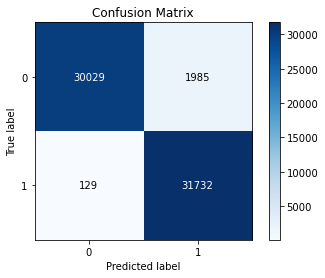

In [73]:
skplt.metrics.plot_confusion_matrix(y_train,cvp_rf)
algo.append('Random forest')
cvs_score.append(cs_rf.mean())

    Decision Tree and Random Forest Classifier shows very high precision and recall scores subjective to overfitting the 
    data hence we can say that Decision tree and random forest Classifier DoesNot applies to this Model

#### Naive Bayes

Cross val score [0.68190357 0.67110207 0.67204133 0.67470257 0.66781465 0.6787224
 0.67559104 0.66838891 0.67355566 0.67809613]
Mean 0.6741918339723997
0.7386146851413503


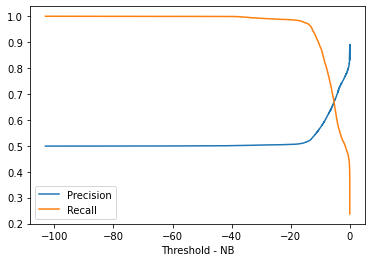

In [43]:
NB_model = GaussianNB()

cvs=cross_val_score(NB_model, X_train,y_train,cv=10)
print('Cross val score',cvs)
print('Mean',cvs.mean())
y_pred = cross_val_predict(NB_model, X_train,y_train,cv=5,method='predict_log_proba')
print(roc_auc_score(y_train,y_pred[:,-1]))
precisionNB, recallNB, thresholdNB = metrics.precision_recall_curve(y_train, y_pred[:,1])  # with sampling trategy = 0.5

plt.plot(thresholdNB,precisionNB[:-1],label = "Precision") # with sampling strategy = 0.5
plt.plot(thresholdNB,recallNB[:-1], label = 'Recall')
plt.xlabel('Threshold - NB')
plt.legend()
plt.show()

In [44]:
y_pred = cross_val_predict(NB_model, X_train,y_train,cv=5)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73     32014
           1       0.79      0.47      0.59     31861

    accuracy                           0.67     63875
   macro avg       0.71      0.67      0.66     63875
weighted avg       0.71      0.67      0.66     63875



In [74]:
algo.append('NaiveBayes')
cvs_score.append(cvs.mean())

#### Ada bosst

In [61]:
ab=AdaBoostClassifier()

cvp_ab=cross_val_predict(ab,X_train,y_train,cv=10,verbose=3)

print('CrossValidation Scores=',cs_ab)
print('Mean CrossValidation Scores',cs_ab.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s


CrossValidation Scores= [0.71835616 0.72219178 0.71976517 0.7235225  0.72375734]
Mean CrossValidation Scores 0.721518590998043


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   49.2s finished


              precision    recall  f1-score   support

           0       0.69      0.80      0.74     32014
           1       0.76      0.64      0.70     31861

    accuracy                           0.72     63875
   macro avg       0.73      0.72      0.72     63875
weighted avg       0.73      0.72      0.72     63875

0.7870618942376923


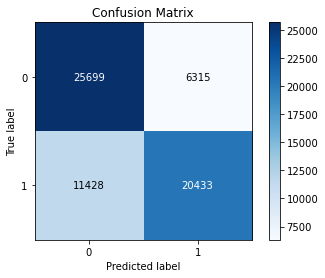

In [62]:
print(classification_report(y_train, cvp_ab))

cvp_ab2=cross_val_predict(ab,X_train,y_train,cv=5,method='predict_proba')

ab_roc_auc = roc_auc_score(y_train, cvp_ab2[:,-1])
print(ab_roc_auc)

skplt.metrics.plot_confusion_matrix(y_train,cvp_ab)


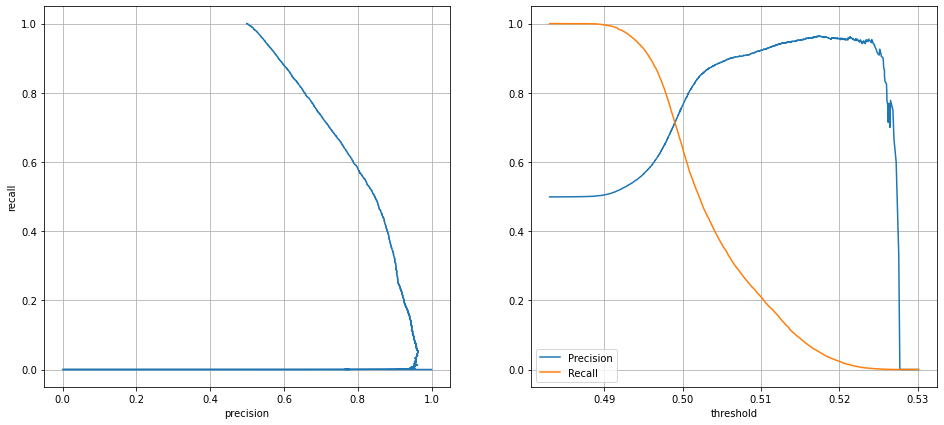

In [139]:
ab_precision,ab_recall,ab_thresh=metrics.precision_recall_curve(y_train,cvp_ab2[:,-1])

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(ab_precision,ab_recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid()

plt.subplot(1,2,2)
plt.plot(ab_thresh,ab_precision[:-1],label='Precision')
plt.plot(ab_thresh,ab_recall[:-1],label='Recall')
plt.xlabel('threshold')
plt.legend()
plt.grid()

In [ ]:
algo.append('ADAboost Classifier')
cvs_score.append(cvp_ab.mean())

#### XGBOOST Classifier

In [46]:
xgb = XGBClassifier(use_label_encoder=False)
cs=cross_val_score(xgb,X_train,y_train,cv=10)

[17:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [47]:
from sklearn.model_selection import cross_val_predict
cvp_predict=cross_val_predict(xgb,X_train,y_train,cv=10)
cvp=cross_val_predict(xgb,X_train,y_train,cv=10,method='predict_proba')

[17:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
algo.append('XgBoostClassifier')
cvs_score.append(cs.mean())

Crossval Scores [0.82686287 0.80510332 0.82451472 0.82263619 0.81715717 0.81462345
 0.82573978 0.81728511 0.82229529 0.82777517]
Mean Crossval Scores 0.8203993068065719
              precision    recall  f1-score   support

           0       0.80      0.85      0.83     32014
           1       0.84      0.79      0.81     31861

    accuracy                           0.82     63875
   macro avg       0.82      0.82      0.82     63875
weighted avg       0.82      0.82      0.82     63875

0.9010471724880368


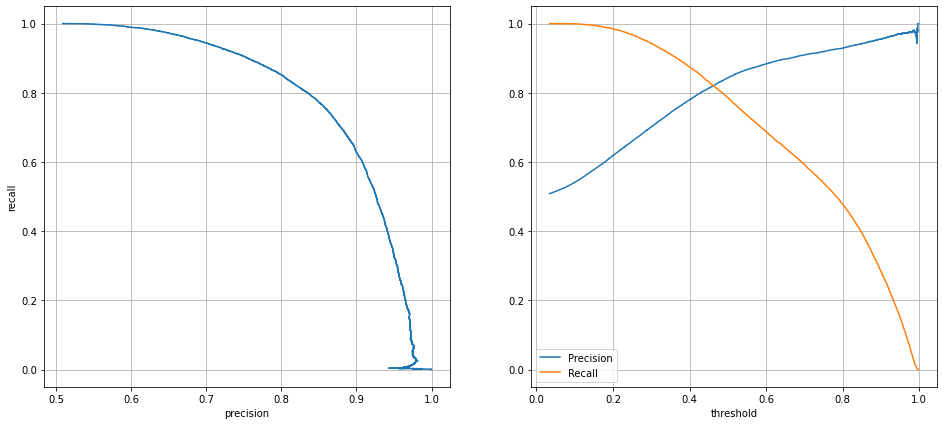

In [49]:
print('Crossval Scores',cs)
print('Mean Crossval Scores',cs.mean())
print(classification_report(y_train, cvp_predict))

logit_roc_auc = roc_auc_score(y_train, cvp[:,1])
print(logit_roc_auc)

metrics.confusion_matrix(y_train,cvp_predict)
xgb_precision,xgb_recall,xgb_thresh=metrics.precision_recall_curve(y_train,cvp[:,-1])

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(xgb_precision,xgb_recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid()

plt.subplot(1,2,2)
plt.plot(xgb_thresh,xgb_precision[:-1],label='Precision')
plt.plot(xgb_thresh,xgb_recall[:-1],label='Recall')
plt.xlabel('threshold')
plt.legend()
plt.grid()

In [ ]:
print('Cross Val Scores of all the models are')
print(pd.DataFrame({'algo':algo,'Crossval scores':cvs_score}))

## HyperParameter Tuning 

### ADA Boost Classifier

#### Tuning the Hyperparameters

In [46]:
#Grid_Search
from sklearn.model_selection import GridSearchCV
#Creating a grid of hyperparameters
grid_params = {    'n_estimators': [100,300,400,600], 'learning_rate':[0.1,0.5,1]}
#Building a 3 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = Adamodel, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
#Fitting the grid to the training data
grid_object.fit(X_train, y_train)
#Extracting the best parameters
grid_object.best_params_

{'learning_rate': 1, 'n_estimators': 600}

In [49]:
#Random_Search
random_params = {'n_estimators':[400,600,700,750,800],
          'learning_rate':[0.01,0.1,0.15,0.5,1]}
#Making models with hyper parameters sets
model1 = RandomizedSearchCV(Adamodel, param_distributions=random_params, n_jobs=1,cv=5,verbose=3)
#Learning
model1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_estimators=600, learning_rate=0.1, score=0.722, total=  29.4s
[CV] n_estimators=600, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.3s remaining:    0.0s


[CV] . n_estimators=600, learning_rate=0.1, score=0.724, total=  29.1s
[CV] n_estimators=600, learning_rate=0.1 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   58.4s remaining:    0.0s


[CV] . n_estimators=600, learning_rate=0.1, score=0.724, total=  29.0s
[CV] n_estimators=600, learning_rate=0.1 .............................
[CV] . n_estimators=600, learning_rate=0.1, score=0.726, total=  29.0s
[CV] n_estimators=600, learning_rate=0.1 .............................
[CV] . n_estimators=600, learning_rate=0.1, score=0.726, total=  28.9s
[CV] n_estimators=600, learning_rate=1 ...............................
[CV] ... n_estimators=600, learning_rate=1, score=0.728, total=  28.9s
[CV] n_estimators=600, learning_rate=1 ...............................
[CV] ... n_estimators=600, learning_rate=1, score=0.728, total=  28.8s
[CV] n_estimators=600, learning_rate=1 ...............................
[CV] ... n_estimators=600, learning_rate=1, score=0.726, total=  29.1s
[CV] n_estimators=600, learning_rate=1 ...............................
[CV] ... n_estimators=600, learning_rate=1, score=0.732, total=  29.1s
[CV] n_estimators=600, learning_rate=1 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 15.3min finished


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(learning_rate=1,
                                                n_estimators=600,
                                                random_state=10),
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.1, 0.5, 1],
                                        'n_estimators': [100, 300, 400, 600]},
                   verbose=3)

In [ ]:
randomsearch best params= 750,1

###### adaModel`

In [85]:
#Creating adaboost classifier object
Adamodel=AdaBoostClassifier(n_estimators=750,learning_rate=1)

# fit the model using fit() on train data
Adamodel.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=750)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      7908
           1       0.77      0.65      0.71      8061

    accuracy                           0.73     15969
   macro avg       0.73      0.73      0.72     15969
weighted avg       0.73      0.73      0.72     15969



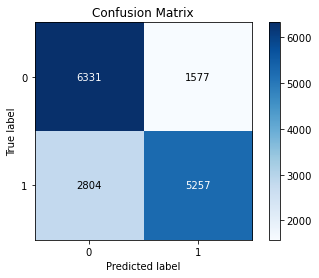

In [86]:
y_pred_ada=Adamodel.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test,y_pred_ada)

print(classification_report(y_test, y_pred_ada))

In [147]:
metrics.accuracy_score(y_test,y_pred_ada)

0.7256559584194376

In [98]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    print(roc_auc_score(y_test,y_pred_prob))
    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)
    return(fpr,tpr)

0.7904346439205309


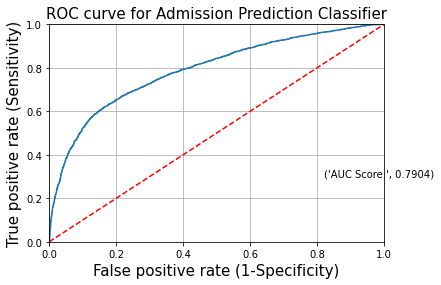

In [99]:
fpr_ada,tpr_ada=plot_roc(Adamodel)

### Knn

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[20,25,30,35,40,45],
          #'weights':['uniform', 'distance'],
          #'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          }
#Making models with hyper parameters sets
model1 = RandomizedSearchCV(model, param_distributions=params, n_iter=5,n_jobs=1,cv=5,verbose=3)
#Learning
model1.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ....................leaf_size=25, n_neighbors=8; total time=  38.3s
[CV 2/5] END ....................leaf_size=25, n_neighbors=8; total time=  36.5s
[CV 3/5] END ....................leaf_size=25, n_neighbors=8; total time=  34.3s
[CV 4/5] END ....................leaf_size=25, n_neighbors=8; total time=  37.0s
[CV 5/5] END ....................leaf_size=25, n_neighbors=8; total time=  34.8s
[CV 1/5] END ....................leaf_size=30, n_neighbors=7; total time=  36.3s
[CV 2/5] END ....................leaf_size=30, n_neighbors=7; total time=  33.2s
[CV 3/5] END ....................leaf_size=30, n_neighbors=7; total time=  35.8s
[CV 4/5] END ....................leaf_size=30, n_neighbors=7; total time=  36.6s
[CV 5/5] END ....................leaf_size=30, n_neighbors=7; total time=  36.9s
[CV 1/5] END ...................leaf_size=20, n_neighbors=10; total time=  36.7s
[CV 2/5] END ...................leaf_size=20, n_n

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=5,
                   n_jobs=1,
                   param_distributions={'leaf_size': [20, 25, 30, 35, 40, 45],
                                        'n_neighbors': [5, 6, 7, 8, 9, 10]},
                   verbose=3)

In [122]:
model1.best_params_

{'n_neighbors': 7, 'leaf_size': 30}

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,leaf_size=30)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(metrics.classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      7908
           1       0.77      0.94      0.85      8061

    accuracy                           0.83     15969
   macro avg       0.85      0.83      0.83     15969
weighted avg       0.85      0.83      0.83     15969



In [133]:
fpr_Knn,tpr_Knn,th=metrics.roc_curve(y_test, knn.predict_proba(X_test)[:,-1])

In [146]:
print(metrics.classification_report(y_test,knn_pred))
metrics.accuracy_score(y_test,knn_pred)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      7908
           1       0.77      0.94      0.85      8061

    accuracy                           0.83     15969
   macro avg       0.85      0.83      0.83     15969
weighted avg       0.85      0.83      0.83     15969



0.8301083348988666

### XGBOOST

###### XGboost Classifier ---- refer to XGB Model Tuning.ipynb

##### Random Search CV

In [54]:
params = {'n_estimators':[300,450,600,650,700,750],
    'gamma': [0.25,0.5, 1, 1.5, 2],
        'max_depth': [4, 5,6,7],
          'learning_rate':[0.1,0.01,0.02],
            'subsample':[0.4,0.6,0.8],'colsample_bytree':[0.4,0.6,0.8,1] }

xgb_hyp = XGBClassifier(objective='binary:logistic',use_label_encoder=False)

xgb_random_search = RandomizedSearchCV(xgb_hyp, param_distributions=params,scoring='roc_auc', 
                                       n_jobs=4, cv=5, verbose=3, random_state=110)
xgb_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[21:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           use_label_encoder=False,
                                    

In [55]:
xgb_random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 700,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 1.5,
 'colsample_bytree': 1}

#### Tuned Xgb Classifier

[00:41:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      7908
           1       0.86      0.82      0.84      8061

    accuracy                           0.84     15969
   macro avg       0.85      0.84      0.84     15969
weighted avg       0.85      0.84      0.84     15969

0.9232846181025974


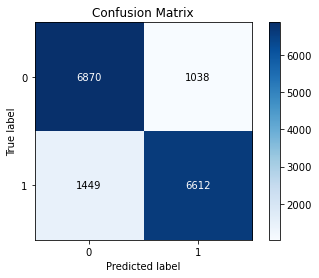

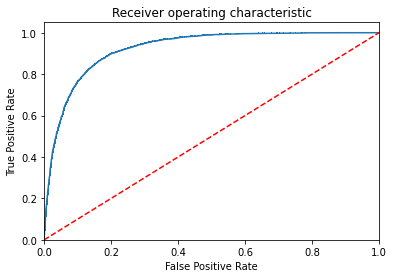

In [100]:
xgb_tuned = XGBClassifier(n_estimators=700,learning_rate=0.1,gamma=1.5,max_depth=5, objective='binary:logistic',
                          min_child_weight =1,colsample_bytree=1,subsample=0.8,
                   use_label_encoder=False)
xgb_tuned.fit(X_train,y_train)

xgb_tuned_predict=xgb_tuned.predict(X_test)
xgb_tuned_proba=xgb_tuned.predict_proba(X_test)
print(classification_report(y_test,xgb_tuned_predict))

skplt.metrics.plot_confusion_matrix(y_test,xgb_tuned_predict)
fpr_XGB, tpr_XGB, thresholds = roc_curve(y_test, xgb_tuned_proba[:,1])
xgb_tuned_score=metrics.roc_auc_score(y_test, xgb_tuned_proba[:,1])
print(xgb_tuned_score)
plt.figure()
plt.plot(fpr_XGB, tpr_XGB, marker=',')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [143]:
metrics.accuracy_score(y_test,xgb_tuned_predict)

0.8442607552132256

#### Tuning Grid Search Cv

In [43]:
params = {'n_estimators':[300,450,600],
    'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [4, 5,6,7],
          'learning_rate':[0.1,0.01,0.02,,0.2,0.5]
        }

xgb_hyp = XGBClassifier( objective='binary:logistic',
                    use_label_encoder=False,booster='gbtree')

xgb_grid_search = GridSearchCV(xgb_hyp, param_grid=params,cv=5, verbose=3,n_jobs=4)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[22:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=0.5, learning_rate=0.1, max_depth=4, n_estimators=300; total time=  19.5s
[22:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=0.5, learning_rate=0.1, max_depth=4, n_estimators=300; total time=  24.5s
[22:44:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV 1/5] END gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  43.4s
[22:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  34.5s
[22:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  32.7s
[22:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061:

[CV 2/5] END gamma=0.5, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  42.8s
[23:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=0.5, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  39.8s
[23:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=0.5, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  39.9s
[23:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061:

[CV 3/5] END gamma=0.5, learning_rate=0.01, max_depth=4, n_estimators=300; total time=  16.6s
[23:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=0.5, learning_rate=0.01, max_depth=4, n_estimators=300; total time=  14.6s
[23:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=0.5, learning_rate=0.01, max_depth=4, n_estimators=300; total time=  14.1s
[23:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 4/5] END gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=450; total time=  28.6s
[23:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=450; total time=  27.1s
[23:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  41.1s
[23:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 5/5] END gamma=0.5, learning_rate=0.01, max_depth=6, n_estimators=600; total time=  45.9s
[23:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=300; total time=  25.9s
[23:39:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=300; total time=  26.9s
[23:39:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 1/5] END gamma=0.5, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  29.8s
[00:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=0.5, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  30.7s
[00:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=0.5, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  30.2s
[00:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 2/5] END gamma=0.5, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  20.9s
[00:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=0.5, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  20.5s
[00:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=0.5, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  20.5s
[00:16:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 3/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=450; total time=  22.8s
[00:26:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=450; total time=  20.1s
[00:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=450; total time=  20.8s
[00:26:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=600; total time=  28.5s
[00:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=600; total time=  27.2s
[00:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1, learning_rate=0.1, max_depth=6, n_estimators=300; total time=  16.5s
[00:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 5/5] END gamma=1, learning_rate=0.01, max_depth=4, n_estimators=450; total time=  19.1s
[00:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1, learning_rate=0.01, max_depth=4, n_estimators=600; total time=  24.4s
[00:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=4, n_estimators=600; total time=  24.9s
[00:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 1/5] END gamma=1, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  16.9s
[00:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  16.8s
[00:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=1, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  17.0s
[00:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  32.9s
[01:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  34.1s
[01:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  37.8s
[01:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 3/5] END gamma=1, learning_rate=0.02, max_depth=4, n_estimators=600; total time=  26.0s
[01:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=1, learning_rate=0.02, max_depth=4, n_estimators=600; total time=  24.2s
[01:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1, learning_rate=0.02, max_depth=4, n_estimators=600; total time=  24.9s
[01:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 4/5] END gamma=1, learning_rate=0.02, max_depth=6, n_estimators=300; total time=  17.1s
[01:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1, learning_rate=0.02, max_depth=6, n_estimators=300; total time=  20.9s
[01:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  29.6s
[01:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 5/5] END gamma=1, learning_rate=0.02, max_depth=7, n_estimators=450; total time= 1.1min
[01:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1, learning_rate=0.02, max_depth=7, n_estimators=600; total time= 1.4min
[01:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=1, learning_rate=0.02, max_depth=7, n_estimators=600; total time= 1.5min
[01:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 1/5] END gamma=1.5, learning_rate=0.1, max_depth=6, n_estimators=450; total time=  30.5s
[07:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=1.5, learning_rate=0.1, max_depth=6, n_estimators=450; total time=  36.1s
[07:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=1.5, learning_rate=0.1, max_depth=6, n_estimators=450; total time=  47.7s
[07:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061:

[CV 2/5] END gamma=1.5, learning_rate=0.1, max_depth=7, n_estimators=600; total time= 1.0min
[07:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=1.5, learning_rate=0.1, max_depth=7, n_estimators=600; total time=  59.0s
[07:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=1.5, learning_rate=0.1, max_depth=7, n_estimators=600; total time= 1.0min
[07:53:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061:

[CV 3/5] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=300; total time=  22.3s
[08:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=300; total time=  22.6s
[08:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=300; total time=  23.1s
[08:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 4/5] END gamma=1.5, learning_rate=0.01, max_depth=7, n_estimators=600; total time=  42.2s
[08:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1.5, learning_rate=0.01, max_depth=7, n_estimators=600; total time=  42.4s
[08:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1.5, learning_rate=0.02, max_depth=4, n_estimators=300; total time=  11.5s
[08:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 5/5] END gamma=1.5, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  25.7s
[08:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1.5, learning_rate=0.02, max_depth=6, n_estimators=600; total time=  33.9s
[08:42:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=1.5, learning_rate=0.02, max_depth=6, n_estimators=600; total time=  34.1s
[08:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 1/5] END gamma=2, learning_rate=0.1, max_depth=4, n_estimators=300; total time=  11.4s
[08:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=2, learning_rate=0.1, max_depth=4, n_estimators=300; total time=  11.5s
[08:52:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=2, learning_rate=0.1, max_depth=4, n_estimators=300; total time=  11.4s
[08:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 2/5] END gamma=2, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  17.8s
[10:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=2, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  17.5s
[10:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=2, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  17.8s
[10:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 3/5] END gamma=2, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  27.1s
[11:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=2, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  27.3s
[11:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=2, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  27.7s
[11:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 4/5] END gamma=2, learning_rate=0.01, max_depth=4, n_estimators=300; total time=  15.6s
[11:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=2, learning_rate=0.01, max_depth=4, n_estimators=300; total time=  23.4s
[11:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=2, learning_rate=0.01, max_depth=4, n_estimators=450; total time=  23.7s
[11:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 5/5] END gamma=2, learning_rate=0.01, max_depth=5, n_estimators=450; total time=  24.2s
[11:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=2, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  36.0s
[11:23:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=2, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  32.5s
[11:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 1/5] END gamma=2, learning_rate=0.02, max_depth=4, n_estimators=450; total time=  23.2s
[11:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=2, learning_rate=0.02, max_depth=4, n_estimators=450; total time=  21.0s
[11:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=2, learning_rate=0.02, max_depth=4, n_estimators=450; total time=  22.8s
[11:46:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 2/5] END gamma=2, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  31.6s
[11:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=2, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  35.1s
[11:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=2, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  32.9s
[11:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 3/5] END gamma=2, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  22.9s
[12:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=2, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  23.5s
[12:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=2, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  23.4s
[12:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 4/5] END gamma=5, learning_rate=0.1, max_depth=4, n_estimators=450; total time=  27.9s
[12:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=5, learning_rate=0.1, max_depth=4, n_estimators=450; total time=  27.6s
[12:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=5, learning_rate=0.1, max_depth=4, n_estimators=600; total time=  37.4s
[12:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 5/5] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=600; total time=  24.8s
[12:25:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=5, learning_rate=0.1, max_depth=6, n_estimators=300; total time=  28.4s
[12:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=5, learning_rate=0.1, max_depth=6, n_estimators=300; total time=  23.4s
[12:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 1/5] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=450; total time=  30.6s
[12:34:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=450; total time=  28.9s
[12:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=450; total time=  29.9s
[12:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 2/5] END gamma=5, learning_rate=0.01, max_depth=4, n_estimators=600; total time=  26.1s
[12:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=5, learning_rate=0.01, max_depth=4, n_estimators=600; total time=  25.5s
[12:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=5, learning_rate=0.01, max_depth=4, n_estimators=600; total time=  24.5s
[12:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 3/5] END gamma=5, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  18.1s
[12:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=5, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  18.1s
[12:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=5, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  16.9s
[12:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 4/5] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  32.9s
[13:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  35.5s
[13:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=600; total time=  43.1s
[13:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 5/5] END gamma=5, learning_rate=0.02, max_depth=4, n_estimators=600; total time=  27.4s
[13:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=5, learning_rate=0.02, max_depth=5, n_estimators=300; total time=  16.5s
[13:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=5, learning_rate=0.02, max_depth=5, n_estimators=300; total time=  16.1s
[13:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 1/5] END gamma=5, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  28.0s
[13:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=5, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  27.9s
[13:20:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=5, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  27.3s
[13:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 600}

#### Tuned XGB MODEL

[00:30:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      7908
           1       0.88      0.85      0.86      8061

    accuracy                           0.86     15969
   macro avg       0.86      0.86      0.86     15969
weighted avg       0.86      0.86      0.86     15969

0.9360189474578544


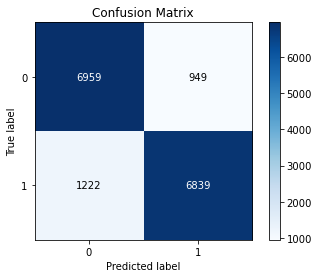

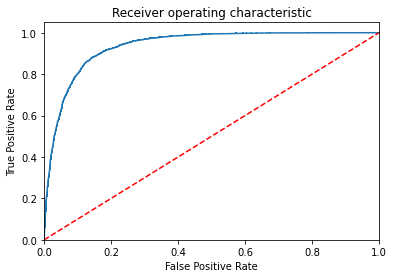

In [96]:
xgb_tuned = XGBClassifier(n_estimators=600,learning_rate=0.1,gamma=.5,max_depth=6, objective='binary:logistic',
                          min_child_weight =1,
                   use_label_encoder=False)

xgb_tuned.fit(X_train,y_train)

xgb_tuned_predict=xgb_tuned.predict(X_test)
xgb_tuned_proba=xgb_tuned.predict_proba(X_test)
print(classification_report(y_test,xgb_tuned_predict))

skplt.metrics.plot_confusion_matrix(y_test,xgb_tuned_predict)

fpr_XGB, tpr_XGB, thresholds = roc_curve(y_test, xgb_tuned_proba[:,1])
xgb_tuned_score=metrics.roc_auc_score(y_test, xgb_tuned_proba[:,1])
print(xgb_tuned_score)
plt.figure()
plt.plot(fpr_XGB, tpr_XGB, marker=',')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

## -----------------------------------------------------------------------------------------------------------------------------------

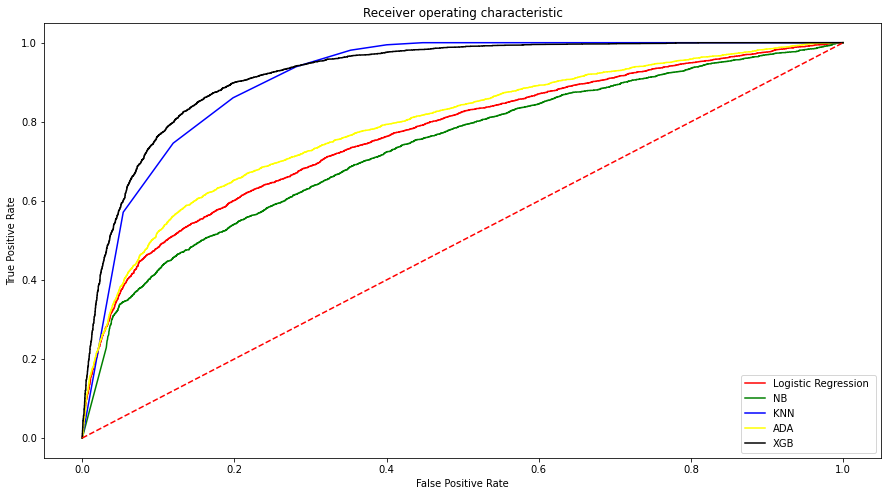

In [138]:
plt.figure(figsize=(15,8))
plt.plot(fpr_logr, tpr_logr, label='Logistic Regression ',color='red' )
plt.plot(fpr_NB, tpr_NB, label='NB ',color='green' )
plt.plot(fpr_Knn,tpr_Knn, label='KNN',color='blue' )

#plt.plot(fpr_Knn,tpr_Knn, label='KNN' )
#plt.plot(fpr_dt, tpr_dt, label='Decision Tree' )
#plt.plot(fpr_RF, tpr_RF, label='Random Forest',color='blue' )
plt.plot(fpr_ada, tpr_ada, label='ADA' ,color='yellow')
plt.plot(fpr_XGB, tpr_XGB, label='XGB',color='black' )
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()